In [1]:
# import pandas as pd
# import numpy as np

# # Set random seed for reproducibility
# np.random.seed(42)

# # Generate realistic height (cm) and weight (kg) data
# heights = np.random.normal(loc=165, scale=10, size=100).round(1)  # Average height ~165 cm
# weights = (heights - 100 + np.random.normal(0, 8, 100)).round(1)   # Weight correlated with height

# # Create DataFrame
# df = pd.DataFrame({
    
#     "Weight_kg": weights,
#     "Height_cm": heights
# })

# # Save to CSV
# file_path = "height_weight_dataset.csv"
# df.to_csv(file_path, index=False)

# df.head(), file_path


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Read the dataset
df = pd.read_csv("height_weight_dataset.csv")
df.head()

,Weight_kg,Height_cm
0,58.7,170.0
1,60.2,163.6
2,68.8,171.5
3,73.8,180.2
4,61.4,162.7


Text(0, 0.5, 'Height')

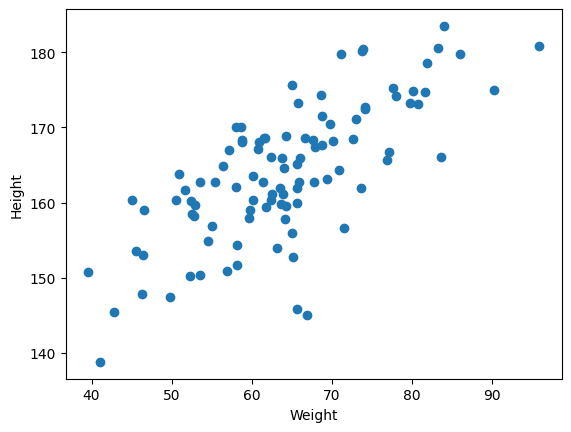

In [4]:
plt.scatter(df['Weight_kg'],df['Height_cm'])
plt.xlabel("Weight")
plt.ylabel("Height")

## Steps
### Step1: Divide the feature based on independent feature (Here i.e Weight) and dependent feature (Here i.e Height) 
### Step2: Train-test Split of the dataset

In [5]:
# Step1:
X = df[['Weight_kg']] ## independent feature
y = df['Height_cm'] ## dependent features

In [6]:
X

,Weight_kg
0,58.7
1,60.2
2,68.8
3,73.8
4,61.4
...,...
95,53.5
96,60.9
97,68.8
98,65.6


In [7]:
y

0     170.0
1     163.6
2     171.5
3     180.2
4     162.7
      ...  
95    150.4
96    168.0
97    167.6
98    165.1
99    162.7
Name: Height_cm, Length: 100, dtype: float64

In [8]:
#  Step2: Train-test split (important step)
from sklearn.model_selection import train_test_split
                  

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)


In [10]:
X.shape

(100, 1)

In [11]:
X_train.shape

(80, 1)

In [12]:
X_test.shape

(20, 1)

In [13]:
y_test.shape

(20,)

In [14]:
y_train.shape

(80,)

In [15]:
X_train.head()

,Weight_kg
55,68.6
88,52.9
26,45.6
42,50.9
69,52.5


In [16]:
#Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #used ONLY on training data
X_test = scaler.transform(X_test) #  Uses the alre/ady learned mean & std ➡️ Actually scales the data
print(X_train)

[[ 0.40543803]
 [-1.00011031]
 [-1.65364552]
 [-1.17916105]
 [-1.03592046]
 [-0.2033345 ]
 [ 0.90678011]
 [-0.28390734]
 [ 0.51286847]
 [-0.00637868]
 [-0.35552763]
 [ 0.08314669]
 [ 0.14581445]
 [-0.38238524]
 [-1.10754076]
 [ 0.16371952]
 [ 0.61134638]
 [ 1.59612547]
 [ 0.10105176]
 [-0.84791718]
 [-1.27763896]
 [ 0.15476699]
 [ 0.89782757]
 [-0.94639509]
 [ 0.02047893]
 [-0.64200882]
 [-0.21228704]
 [ 1.74831861]
 [-0.07799898]
 [ 0.13686191]
 [ 0.02047893]
 [ 0.87096996]
 [-0.47191062]
 [-0.52562584]
 [-0.14961928]
 [-0.02428376]
 [ 2.84948068]
 [ 1.49764756]
 [-0.29285987]
 [-0.54353091]
 [ 0.66506161]
 [-0.93744255]
 [ 1.21116637]
 [-0.05114137]
 [ 0.54867862]
 [ 2.33918606]
 [-1.2149712 ]
 [ 0.22638728]
 [ 0.47705833]
 [ 0.4233431 ]
 [ 0.2532449 ]
 [ 1.17535623]
 [-0.47191062]
 [ 0.76353951]
 [ 0.13686191]
 [ 0.14581445]
 [ 1.40812219]
 [-0.68677151]
 [-0.14066674]
 [ 1.4349798 ]
 [-1.58202523]
 [-0.80315449]
 [-1.90431657]
 [-0.53457838]
 [-0.3465751 ]
 [-1.00906285]
 [-0.77629

 .fit() will compute/calculate the mean and std deviation to get Z-points
 and transform() will apply to all the data points

 for testing data, we need not to calculate again of mean and std deviation
 it uses already calculated Z-points from the X_Train

 .fit_transform() # training data
 .transform() # test data

 My Model should not know about anything of my data

In [17]:
print(X_test)

[[-0.03323629]
 [ 0.79934966]
 [-0.23019211]
 [ 0.00257385]
 [-1.05382553]
 [-0.61515121]
 [ 1.14849861]
 [ 0.33381773]
 [-1.70736075]
 [-0.48086315]
 [ 0.08314669]
 [-1.56412015]
 [ 1.72146099]
 [-0.52562584]
 [-0.14961928]
 [-0.23914465]
 [ 0.17267206]
 [ 0.85306489]
 [ 0.34277027]
 [ 1.78412875]]


## Where we really need to Standardize data
### where we have Distance based Algorithms, optimization type of Algorithm,
### In Linear Regression really needs to be Standardized.

#### Standardization is a preprocessing technique where features are rescaled to have mean 0 and standard deviation 1.
#### It is required for distance-based and gradient-based algorithms such as 
#### KNN, 
#### SVM
#### Logistic Regression, 
#### K-Means
 #### PCA
#### Neural Networks.
#### It works by subtracting the mean and dividing by the standard deviation. fit() learns parameters, transform() applies them, and fit_transform() does both. Standardization must be applied using training data only to avoid data leakage.

 z = x − μ​ /σ
 
σ = Std deviation
μ = Mean
Z = Standardization


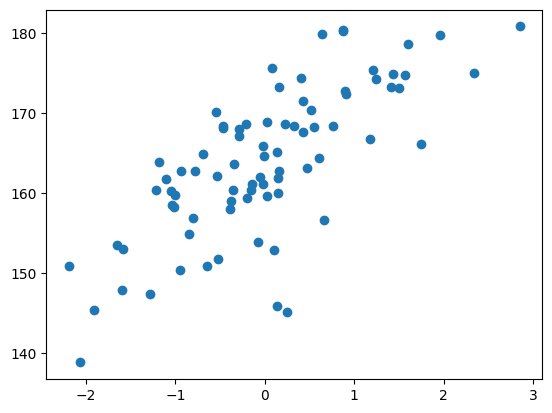

In [18]:
plt.scatter(X_train,y_train)

In [19]:
## Train our simple linear Regression model
from sklearn.linear_model import LinearRegression


In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
print("The slope / Coefficient of weight is",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope / Coefficient of weight is [6.86431662]
Intercept: 163.81875


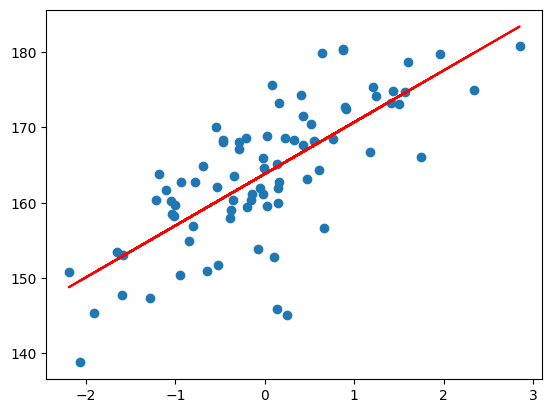

In [31]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### Prediction of Train Data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_train = 163.81875 + 6.86431662(X_train)

### Prediction of test Data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_test = 163.81875 + 6.86431662(X_test)


In [32]:
y_pred_test = regressor.predict(X_test)

In [33]:
y_pred_test,y_test

(array([163.59060555, 169.30573918, 162.23863846, 163.83641775,
        156.58495788, 159.59615732, 171.70240812, 166.11018059,
        152.09888525, 160.51795306, 164.3894952 , 153.08213404,
        175.63540331, 160.21068782, 162.79171591, 162.17718541,
        165.0040257 , 169.67445748, 166.17163364, 176.06557466]),
 83    159.8
 53    171.1
 70    168.6
 45    157.8
 44    150.2
 39    167.0
 22    165.7
 80    162.8
 10    160.4
 0     170.0
 18    155.9
 30    159.0
 73    180.6
 33    154.4
 90    166.0
 4     162.7
 76    165.9
 77    162.0
 12    167.4
 31    183.5
 Name: Height_cm, dtype: float64)

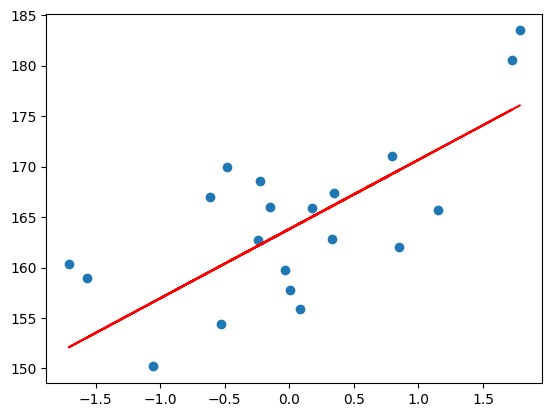

In [34]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics

### MSE , MAE, RMSE
### R square and Adjusted R Square -> Model performance / Accuracy

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [ ]:
## Mse,mae,rmse says that "How many errors are still left with respect to the model doing prediction to the test data
mse  = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

34.42159239893638
5.250708223355876
5.866991767416789


### RSquare
Formula: R^2 = 1- SSR / SST

R^2 = Coefficient of determination

SSR = Sum of Squares of Residuals

SST = Total sum of squares 

In [39]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

0.4439107261308447

### Adjusted R Square
Adjusted R^2 = 1-[(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model 

n : The number of observations

K : The number of Predictor Variables

In [40]:
# display adjusted R-Squared
1 - (1-score) *(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.41301687758255823

In [42]:
regressor

LinearRegression()

In [44]:
# new data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.42602727]])

In [45]:
regressor.predict(scaled_weight)

array([173.60745266])

In [47]:
print("The Height prediction for weight 80kg is :",regressor.predict([scaled_weight[0]]))

The Height prediction for weight 80kg is : [173.60745266]


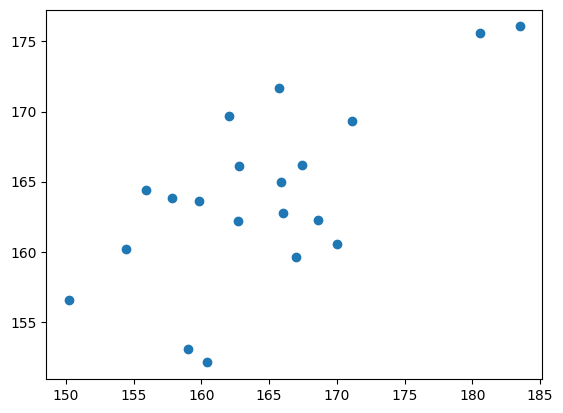

In [50]:
## Assumptions 
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [52]:
## residuals
residuals = y_test - y_pred_test
residuals 

83   -3.790606
53    1.794261
70    6.361362
45   -6.036418
44   -6.384958
39    7.403843
22   -6.002408
80   -3.310181
10    8.301115
0     9.482047
18   -8.489495
30    5.917866
73    4.964597
33   -5.810688
90    3.208284
4     0.522815
76    0.895974
77   -7.674457
12    1.228366
31    7.434425
Name: Height_cm, dtype: float64

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


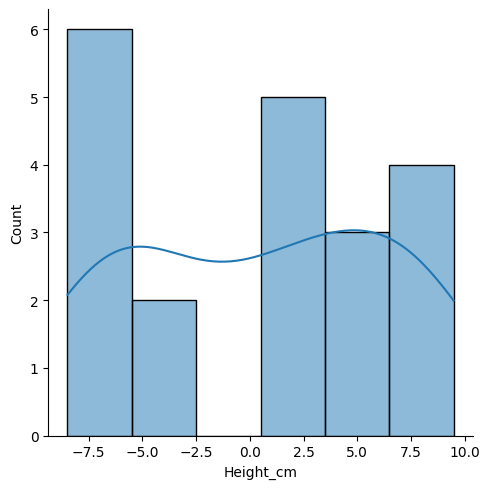

In [57]:
# plot the residuals
import seaborn as sns
sns.displot(residuals,kde='true')